In [133]:
import pandas as pd
import matplotlib.pyplot as plt



In [134]:
import numpy as np
def ms_to_s(lst):
    m = np.mean(lst)
    return m/1000

In [159]:
df = pd.read_csv('topo_size_cp.csv')
df = df.sort_values(by=['Testcase'])
df = df[["Testcase","# Switches", "Optimization Time (ms)"]]
df = df.groupby("Testcase").agg({"Optimization Time (ms)": ms_to_s, "# Switches": np.mean})
df

,Optimization Time (ms),# Switches
Testcase,,
topo_size0,0.9590,6
topo_size1,1.0322,8
topo_size2,1.2000,10
topo_size3,2.2312,12
topo_size4,6.9592,14
topo_size5,6.6828,16
topo_size6,6.9962,18
topo_size7,15.0378,20
topo_size8,17.9466,22


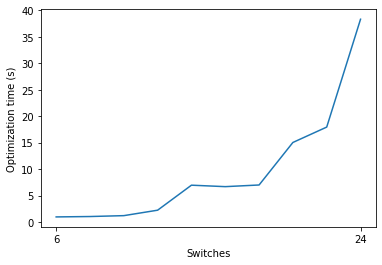

In [161]:
x_toposize = df["# Switches"]
y_toposize = df["Optimization Time (ms)"]
df.to_csv("topo_size.csv")
plt.plot(x_toposize,y_toposize)
plt.xticks([x_toposize[0], x_toposize[-1]])
plt.xlabel("Switches")
plt.ylabel("Optimization time (s)")
#plt.savefig('topo_size.pdf',bbox_inches='tight') 
plt.show()


In [162]:
df = pd.read_csv('apps_cp.csv')
df = df.sort_values(by=['Testcase'])
df["Sum"] = [t+(t/4) for t in df["# Tasks"]]
# drop testcase 5 because it has unusually high stream overlap
df = df[df["Testcase"]!="apps5"]
df = df[["Testcase","# Tasks", "# Streams", "Optimization Time (ms)", "Sum"]]
df = df.groupby("Testcase").agg({"Optimization Time (ms)": ms_to_s, "# Tasks": np.mean, "# Streams": np.mean, "Sum": np.mean})
df

,Optimization Time (ms),# Tasks,# Streams,Sum
Testcase,,,,
apps0,1.2056,8,2,10.0
apps1,2.1638,16,4,20.0
apps2,4.0816,24,6,30.0
apps3,14.0774,32,8,40.0
apps4,28.4730,40,10,50.0
apps6,130.5210,56,13,70.0
apps7,554.7962,64,15,80.0
apps8,593.0085,72,18,90.0
apps9,844.8555,80,19,100.0


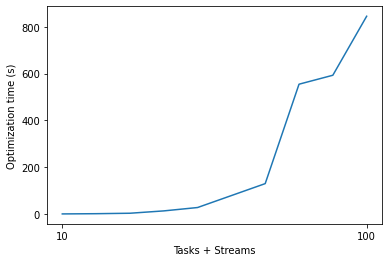

In [163]:
x_apps = df["Sum"]
y_apps = df["Optimization Time (ms)"]
df.to_csv("task_streams.csv")
plt.plot(x_apps,y_apps)
plt.xticks([10,100])
plt.xlabel("Tasks + Streams")
plt.ylabel("Optimization time (s)")
#plt.savefig('apps.pdf',bbox_inches='tight') 
plt.show()


In [164]:
df = pd.read_csv('topo_size_plus_apps_cp.csv')
df = df.sort_values(by=['Testcase'])
df = df[["Testcase","# Tasks", "# Switches", "Optimization Time (ms)"]]
df = df.groupby("Testcase").agg({"Optimization Time (ms)": ms_to_s, "# Tasks": np.mean, "# Switches": np.mean})
df

,Optimization Time (ms),# Tasks,# Switches
Testcase,,,
topo_size_plus_apps0,0.457556,8,6
topo_size_plus_apps1,1.182333,16,8
topo_size_plus_apps2,12.455889,24,10
topo_size_plus_apps3,3548.663000,32,12
topo_size_plus_apps4,2195.501500,40,14
topo_size_plus_apps5,6260.073286,48,16
topo_size_plus_apps6,9594.263250,56,18
topo_size_plus_apps7,9941.162200,64,20
topo_size_plus_apps9,11208.505000,80,24


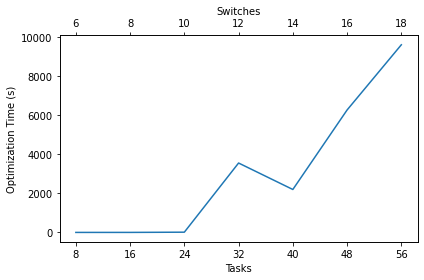

In [165]:
x_both_tasks = df["# Tasks"][:7]
x_both_switches = df["# Switches"][:7]
y_both = df["Optimization Time (ms)"][:7]

df.to_csv("both.csv")

fig, ax1 = plt.subplots()
ax1.set_ylabel("Optimization Time (s)")
ax1.set_xlabel("Tasks")
ax1.set_xticks(x_both_tasks)
ax1.plot(x_both_tasks, y_both)
ax2 = ax1.twiny()
ax2.set_xlabel("Switches")
ax2.set_xticks(x_both_switches)
ax2.plot(x_both_switches, y_both, visible=False)
fig.tight_layout()
#plt.savefig('topo_plus_apps.pdf',bbox_inches='tight') 
plt.show()


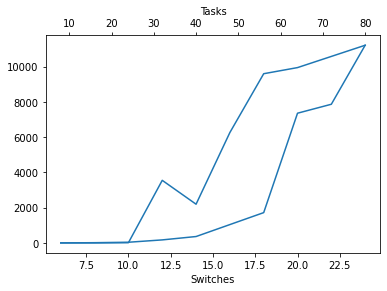

In [147]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.set_xlabel("Switches")
ax.plot(x_toposize,y_toposize)


ax2.xaxis.tick_top()
ax2.set_xlabel("Tasks")
ax2.xaxis.set_label_position('top')
ax2.set_yticks([])
ax2.plot(x_apps,y_apps)

#plt.plot(x_both,y_both)